In [16]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from karateclub import DeepWalk, Walklets, HOPE, NetMF, Diff2Vec, GraRep, Node2Vec
from utils import read_data, get_cosine_sim_matrix, preprocessing_, compute_metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import pickle
import gensim.downloader
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.decomposition import PCA
import pandas as pd
import random

In [17]:

def visualize_TSNE(embeddings,target):
    tsne = TSNE(n_components=2)
    data = tsne.fit_transform(embeddings)
    print(data.shape)
#     data = embeddings
    #plt.figure(figsize=(12, 6))
    plt.title("TSNE visualization of the embeddings")
    plt.scatter(data[:,0],data[:,1],c=target)

    return

In [18]:
with open('data/mendeley/preprocessed_data.pkl', 'rb') as f: #data_test_all_50 data_test_[christian_gra_med]_150.pkl data_test_all  data_test_z5_N50.pkl reuters_vectorized_data_dang.pkl
    text_corpus = pickle.load(f)

df = pd.read_excel('data/mendeley/Data.xlsx')
train_label = list(df.Y)
paranet_labels = list(df.Domain)

list_name = {'CS ': 0, 'MAE ':1, 'Civil ':2, 'ECE ':3, 'biochemistry ':4, 'Psychology  ':5, 'Medical ':6}

## Pick half of mendeley
total_pick = int(len(train_label)/2)
index_list = list(range(len(train_label)))
# random item from list
sample_list_idx = random.choices(train_label, k=10000)

text_corpus = [text_corpus[i] for i in sample_list_idx]
train_label = [train_label[i] for i in sample_list_idx]

new_parent_label = [paranet_labels[i] for i in sample_list_idx]
parent_label_to_num = [list_name[i] for i in new_parent_label]

In [19]:
pca = PCA(n_components=192)

In [20]:
target = train_label
d = 62
# target = parent_label_to_num

## Word2vec

In [21]:
w2v = gensim.downloader.load('word2vec-google-news-300')

In [22]:
temp_vec = []
for doc in text_corpus:
    words = doc.split()
    temp_vec.append(np.mean([w2v[w] if w in w2v else np.zeros(300) for w in words ], axis=0))

temp_vec = np.array(temp_vec)
temp_vec = pca.fit_transform(temp_vec); temp_vec.shape

(10000, 192)

(10000, 2)


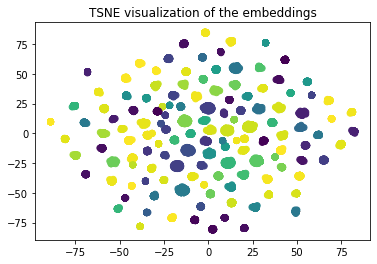

In [23]:
visualize_TSNE(temp_vec, target)

In [24]:
scaler = MinMaxScaler()
scaler.fit(temp_vec)
scaled_emb = scaler.transform(temp_vec)
compute_metrics(scaled_emb, target)


Evaluated embeddings using Multinomial Naive Bayes
F1 - score(Macro) :  0.9956501722689586
NMI :  0.9951405276843143


0.9956501722689586

In [25]:
kmeans = KMeans(n_clusters=d, random_state=0).fit(temp_vec)
nmi = normalized_mutual_info_score(target,kmeans.labels_)
print(nmi)

0.8035088802196482


## Glove

In [26]:
w2v = gensim.downloader.load('glove-wiki-gigaword-300')

In [27]:
temp_vec = []
for doc in text_corpus:
    words = doc.split()
    temp_vec.append(np.mean([w2v[w] if w in w2v else np.zeros(300) for w in words ], axis=0))

temp_vec = np.array(temp_vec)
temp_vec = pca.fit_transform(temp_vec); temp_vec.shape

(10000, 192)

(10000, 2)


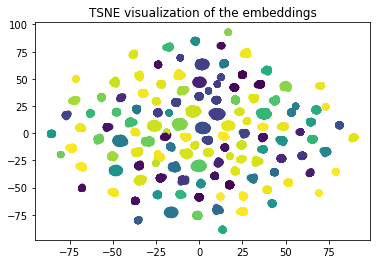

In [28]:
visualize_TSNE(temp_vec, target)

In [29]:
scaler = MinMaxScaler()
scaler.fit(temp_vec)
scaled_emb = scaler.transform(temp_vec)
compute_metrics(scaled_emb, target)


Evaluated embeddings using Multinomial Naive Bayes
F1 - score(Macro) :  0.9888902765115667
NMI :  0.9874244481489416


0.9888902765115667

In [30]:
kmeans = KMeans(n_clusters=d, random_state=0).fit(temp_vec)
nmi = normalized_mutual_info_score(target,kmeans.labels_)
print(nmi)

0.8021015589525847


## Fasttext

In [31]:
w2v = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [32]:
temp_vec = []
for doc in text_corpus:
    words = doc.split()
    temp_vec.append(np.mean([w2v[w] if w in w2v else np.zeros(300) for w in words ], axis=0))

temp_vec = np.array(temp_vec)
temp_vec = pca.fit_transform(temp_vec); temp_vec.shape

(10000, 192)

(10000, 2)


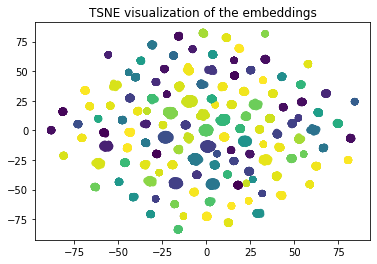

In [33]:
visualize_TSNE(temp_vec, target)

In [34]:
scaler = MinMaxScaler()
scaler.fit(temp_vec)
scaled_emb = scaler.transform(temp_vec)
compute_metrics(scaled_emb, target)


Evaluated embeddings using Multinomial Naive Bayes
F1 - score(Macro) :  0.9989195004532436
NMI :  0.9988626458575665


0.9989195004532436

In [35]:
kmeans = KMeans(n_clusters=d, random_state=0).fit(temp_vec)
nmi = normalized_mutual_info_score(target,kmeans.labels_)
print(nmi)

0.8202865248158688
